In [1]:
%pylab inline
from SimPEG import DCIP as DC

Populating the interactive namespace from numpy and matplotlib



Bad key "axes.spines.right" on line 210 in
/Users/sgkang/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "boxplot.flierprops.linewidth" on line 321 in
/Users/sgkang/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "contour.corner_mask" on line 306 in
/Users/sgkang/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "boxplot.vertical" on line 339 in
/Users/sgkang/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/sty

In [2]:
"../data/ChungCheonDC/"

'../data/ChungCheonDC/'

In [3]:

def readReservoirDC(fname):
    f = open(fname, 'r')
    data = f.readlines()
    temp = data[3].split()
    nelec, ndata, aspacing = int(temp[0]), int(temp[1]), float(temp[2])
    ntx = nelec-2
    datalist = []
    for iline, line in enumerate(data[4:4+ndata]):
    #     line = line.replace(ignorevalue, 'nan')
        linelist = line.split()    
        datalist.append(np.array(map(float, linelist)))
    DAT = np.vstack(datalist)
    datalistSRC = []
    srcList = []
#     for i in range(ntx-1):
    for i in range(ntx-1):        
        txloc = np.array([i+2, i+1.])
        ind = (DAT[:,:2] == txloc).sum(axis=1) == 2.
        temp = DAT[ind,:]
        datalistSRC.append(temp)
        e = np.zeros_like(temp[:,2])
        rxtemp = DC.RxDipole(np.c_[temp[:,2]*aspacing, e, e], np.c_[temp[:,3]*aspacing, e, e])
        srctemp = DC.SrcDipole([rxtemp], np.r_[txloc[1]*aspacing, 0., 0.], np.r_[txloc[0]*aspacing, 0., 0.])
        srcList.append(srctemp)
    DAT_src = np.vstack(datalistSRC)    
    survey = DC.SurveyDC(srcList)
    survey.dobs = DAT_src[:,-1]
    return survey

In [4]:
fname1 = "../data/ChungCheonDC/20150101000000.apr"
fname2 = "../data/ChungCheonDC/20150105060000.apr"

In [5]:
survey1 = readReservoirDC(fname1)
survey2 = readReservoirDC(fname2)
survey12 = readReservoirDC(fname2)

In [6]:
# ind = (survey1.dobs > 200.) | (survey2.dobs > 200.)
# survey1.dobs[ind] = np.median(survey1.dobs)
# survey2.dobs[ind] = np.median(survey2.dobs)

(array([ 205.,  155.,   19.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.]),
 array([  10.3379  ,   17.541355,   24.74481 ,   31.948265,   39.15172 ,
          46.355175,   53.55863 ,   60.762085,   67.96554 ,   75.168995,
          82.37245 ,   89.575905,   96.77936 ,  103.982815,  111.18627 ,
         118.389725,  125.59318 ,  132.796635,  140.00009 ,  147.203545,
         154.407   ]),
 <a list of 20 Patch objects>)

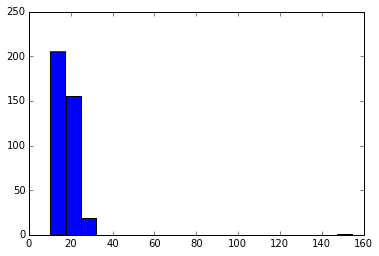

In [7]:
hist(survey2.dobs, bins=20)

In [8]:
survey12.dobs = abs(survey2.dobs-survey1.dobs) / abs(survey1.dobs)

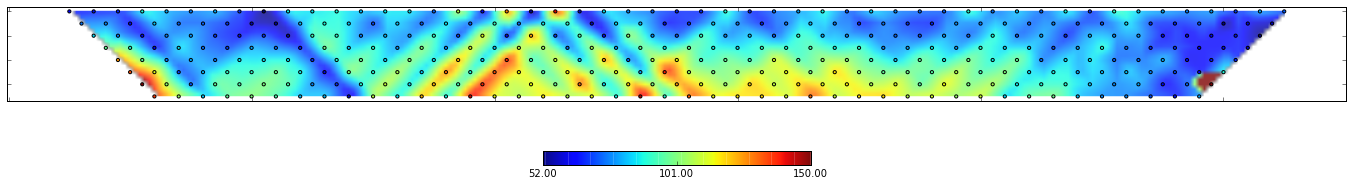

In [9]:
fig, ax = plt.subplots(1,1, figsize = (12*2, 3*2))
DC.plot_pseudoSection(survey1, ax, "dpdp", dtype="appr", clim=[52, 150.])

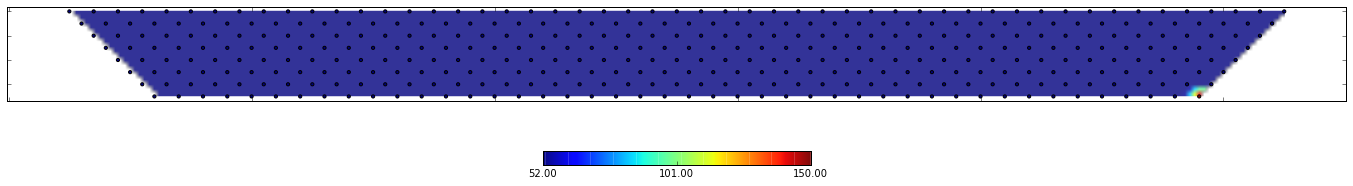

In [10]:
fig, ax = plt.subplots(1,1, figsize = (12*2, 3*2))
DC.plot_pseudoSection(survey2, ax, "dpdp", dtype="appr", clim=[52, 150.])

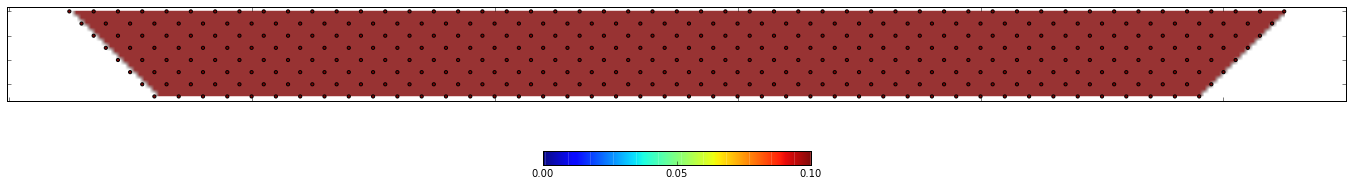

In [11]:
fig, ax = plt.subplots(1,1, figsize = (12*2, 3*2))
DC.plot_pseudoSection(survey12, ax, "dpdp", dtype="appr", clim=[0., 0.1])